# Volume 4: Finite Element Method
    Daniel Perkins
    MATH 437
    11/23/24

In [1]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.

Implement the function FEM(x, eps, alpha, beta) and use it to solve the differential equation.

In [2]:
def analytic_solution(x):
    """Calculates the analytic solution"""
    alpha = 2
    beta = 4
    epsilon = 0.02
    return alpha + x + (beta - alpha - 1)*(np.exp(x/epsilon)-1)/(np.exp(1/epsilon)-1)

In [31]:
def FEM(x, eps, alpha, beta):
    """
    Creates the matrix A and vector Phi for the finite element method as
    described in the pdf
    
    Params:
        x (ndarray, (N+1)) - grid points to solve the ODE on (they might not be evenly-spaced)
        eps (float) - parameter in the ODE
        alpha (float) - left Dirichlet condition
        beta (float) - right Dirichlet condition
    Return:
        A   : scipy sparse matrix
        Phi : ndarray
    """
    def a(i, j):    # Equation 12.7
        if i > 0: h_i = x[i] - x[i-1]
        if i < len(x)-1: h_plus = x[i+1] - x[i]
        if j==i+1: return eps / h_plus + 1/2
        elif j==i: return -eps/h_i - eps/h_plus
        elif j==i-1: return eps/h_i - 1/2
        else: return 0 
    def l(j):    # Equation 12.8
        h_j = x[j] - x[j-1]
        h_plus = x[j+1] - x[j]
        return -(1/2.)*(h_j+h_plus)
    
    # Create the matrix A and vector Phi
    n = len(x) - 1
    left = np.array([a(i, i+1) for i in range(n-1)] + [0])
    middle = np.array([1] + [a(i, i) for i in range(1, n)] + [1])
    right = np.array([0] + [a(i+1, i) for i in range(1, n)])
    A = diags((left, middle, right), (-1, 0, 1), (n+1, n+1))
    Phi = np.array([alpha] + [l(i) for i in range(1, n)] + [beta])
    
    return A, Phi

/home/dbp52/.acme-venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


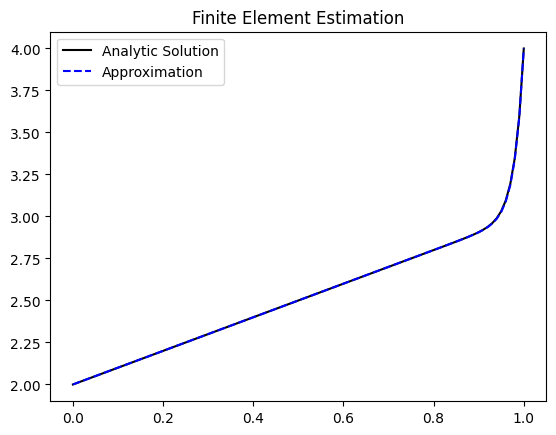

In [40]:
# Get solution with N=100
N = 100
x = np.linspace(0, 1, N+1)
alpha = 2
beta = 4
eps = 0.02
A, Phi = FEM(x, eps, alpha, beta)
K = spsolve(A, Phi)

# Plot true solution and the approximation
plt.plot(x, analytic_solution(x), c="black", label="Analytic Solution")
plt.plot(x, K, c="blue", ls="--", label="Approximation")
plt.title("Finite Element Estimation")
plt.legend()
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

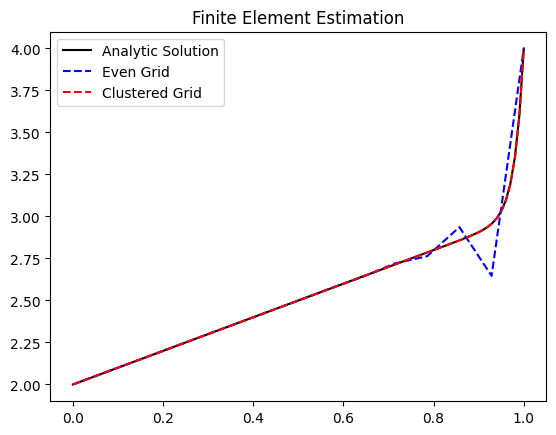

In [42]:
# Initial conditions
N = 100
a, b = 0, 1
x = np.linspace(0, 1, N+1)
even_grid = np.linspace(a, b, 15)
clustered_grid = np.linspace(a, b, 15)**(1/8)
alpha = 2
beta = 4
eps = 0.02

# Get solutions
A_even, Phi_even = FEM(even_grid, eps, alpha, beta)
K_even = spsolve(A_even, Phi_even)
A_cluster, Phi_cluster = FEM(clustered_grid, eps, alpha, beta)
K_cluster = spsolve(A_cluster, Phi_cluster)

# Plot true solution and the approximation
plt.plot(x, analytic_solution(x), c="black", label="Analytic Solution")
plt.plot(even_grid, K_even, c="blue", ls="--", label="Even Grid")
plt.plot(clustered_grid, K_cluster, c="red", ls="--", label="Clustered Grid")
plt.title("Finite Element Estimation")
plt.legend()
plt.show()


# Problem 3

Solve 

$\epsilon y'' - y' = -1$

$y(0)=\alpha, y(1)=\beta$

with the finite element method using N = 2i finite elements, i = 4, 5, . . . , 21.
Use a log-log plot to graph the error.

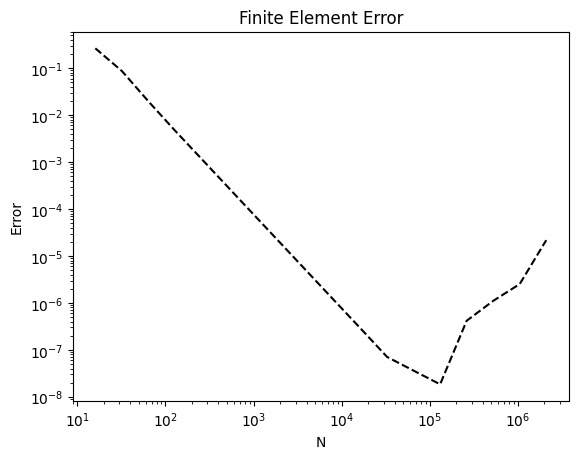

In [48]:
Ns = 2**np.arange(4, 22)
alpha = 2
beta = 4
eps = 0.02
errors = []

for N in Ns:  # For each value of N, solve the PDE
    x = np.linspace(0, 1, N+1)
    A, Phi = FEM(x, eps, alpha, beta)
    K = spsolve(A, Phi)
    error = np.max(np.abs(K - analytic_solution(x)))  # Compute error
    errors.append(error)

# Plot true solution and the approximation
plt.loglog(Ns, errors, c="black", ls="--")
plt.title("Finite Element Error")
plt.xlabel("N")
plt.ylabel("Error")
plt.show()
